Imports

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

Data

In [45]:
# mean = 0, variance = 1
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

Relationship

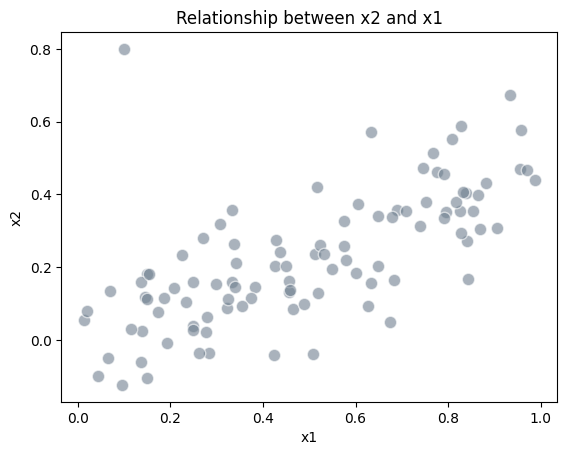

In [46]:
plt.scatter(x1, x2, color="slategrey", alpha=0.6, edgecolors="w", s=80)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Relationship between x2 and x1")
plt.show()

Regression

$$
\text{Var}(AX) = A \times Var(X) \times A^T. \\
\hat{\beta} = (X^TX)^{-1}X^Ty \\ 
\text{Var}(\hat{\beta}) = \sigma^2 (X^T X)^{-1}

$$


In [47]:
X_matrix = np.column_stack([[1 for _ in range(len(y))], x1, x2])

beta_vector = np.matmul(
    np.linalg.inv(np.matmul(X_matrix.transpose(), X_matrix)),
    np.matmul(X_matrix.transpose(), y),
)

print("True \u03B2: [2, 2, 0.3]")
print(f"Predicted \u03B2: {beta_vector}")

error_variance = 1
beta_variance = error_variance * np.linalg.inv(np.matmul(X_matrix.transpose(), X_matrix))
standard_errors = np.sqrt(np.diag(beta_variance))

t_stat1 = beta_vector[1] / standard_errors[1]
t_stat2 = beta_vector[2] / standard_errors[2]

p_value1 = (1 - norm.cdf(t_stat1)) * 2
p_value2 = (1 - norm.cdf(t_stat2)) * 2

print(f"\u03B21:  t-statistic = {t_stat1:.3f}   p-value = {p_value1*100:.3f}%")
print(f"\u03B22:  t-statistic = {t_stat2:.3f}   p-value = {p_value2*100:.3f}%")

True β: [2, 2, 0.3]
Predicted β: [2.06179126 0.85754482 2.26632349]
β1:  t-statistic = 1.724   p-value = 8.472%
β2:  t-statistic = 3.016   p-value = 0.256%


Regression with $x_1$ only

In [48]:
X_matrix = np.column_stack([[1 for _ in range(len(y))], x1])

beta_vector = np.matmul(
    np.linalg.inv(np.matmul(X_matrix.transpose(), X_matrix)),
    np.matmul(X_matrix.transpose(), y),
)

print("True \u03B2: [2, 2]")
print(f"Predicted \u03B2: {beta_vector}")

error_variance = 1
beta_variance = error_variance * np.linalg.inv(np.matmul(X_matrix.transpose(), X_matrix))
standard_errors = np.sqrt(np.diag(beta_variance))

t_stat1 = beta_vector[1] / standard_errors[1]
p_value1 = (1 - norm.cdf(t_stat1)) * 2


print(f"\u03B21:  t-statistic = {t_stat1:.3f}   p-value = {p_value1*100:.6f}%")

True β: [2, 2]
Predicted β: [2.0739405  1.87604564]
β1:  t-statistic = 5.137   p-value = 0.000028%


Regression with $x_2$ only

In [49]:
X_matrix = np.column_stack([[1 for _ in range(len(y))], x2])

beta_vector = np.matmul(
    np.linalg.inv(np.matmul(X_matrix.transpose(), X_matrix)),
    np.matmul(X_matrix.transpose(), y),
)

print("True \u03B2: [2, 0.3]")
print(f"Predicted \u03B2: {beta_vector}")

error_variance = 1
beta_variance = error_variance * np.linalg.inv(np.matmul(X_matrix.transpose(), X_matrix))
standard_errors = np.sqrt(np.diag(beta_variance))

t_stat1 = beta_vector[1] / standard_errors[1]
p_value1 = (1 - norm.cdf(t_stat1)) * 2


print(f"\u03B22:  t-statistic = {t_stat1:.3f}   p-value = {p_value1*100:.6f}%")

True β: [2, 0.3]
Predicted β: [2.28401186 3.14584863]
β2:  t-statistic = 5.702   p-value = 0.000001%
